Retail Customer Segmentation with RFM Model

-------------------------------------------------------------

1.Assaying data

Python libraries like NumPy, Pandas, Matplotlib, and Seaborn are needed for data cleaning, data analysis, and visualization.

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data in CSV file
df = pd.read_csv('/Users/admin/Downloads/Online_Retail_Data.csv'
                     , parse_dates = ['InvoiceDate'])

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [2]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
# Count distinct values in each field 
df[df.columns].nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

2.Data Cleaning

In [4]:
# Check for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# View records with missing customer ID
df[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [6]:
# Drop all rows with null in CustomerID
df.dropna(subset = 'CustomerID', inplace = True) 

df.shape

(406829, 8)

In [8]:
# Check for duplicates
df.duplicated().sum()

5225

In [9]:
# Drop duplicates
df.drop_duplicates(keep = 'last', inplace = True)

df.shape

(401604, 8)

In [10]:
# Check data in numeric fields
df[['Quantity', 'UnitPrice']].agg({'Quantity':['min', 'mean', 'max'],
                                   'UnitPrice':['min', 'mean', 'max']})

,Quantity,UnitPrice
min,-80995.000000,0.000000
mean,12.183273,3.474064
max,80995.000000,38970.000000


In [11]:
print(df[df['Quantity'] <= 0].shape[0])
print(df[df['UnitPrice'] == 0].shape[0])
print(df[(df['Quantity'] <= 0) | (df['UnitPrice'] == 0)].shape[0])

8872
40
8912


In [12]:
# Exclude rows with negative or zero in both fields
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.shape

(392692, 8)

3.Data Manipulation

In [13]:
# Create SumTotal column
df['SumTotal'] = df['Quantity'] * df['UnitPrice']

df[['Quantity', 'UnitPrice', 'SumTotal']].head()

,Quantity,UnitPrice,SumTotal
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [14]:
# Find the average customer spending per time
basket_size = df.groupby('InvoiceNo')['SumTotal'].sum()

print('The average basket size per shopping time is $',
      round(basket_size.mean(), 2))

The average basket size per shopping time is $ 479.56


In [16]:
# Recency column
recency_df = (df['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].max()).dt.days

# Frequency column
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Monetary column
monetary_df = df.groupby('CustomerID')['SumTotal'].sum()

# Merge RFM columns into a new dataframe
final_df = pd.merge(recency_df, frequency_df, on = 'CustomerID', how = 'inner')
final_df = pd.merge(final_df, monetary_df, on = 'CustomerID', how = 'inner')

# Rename the columns
final_df.rename(columns = {'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'SumTotal':'Monetary'},
                            inplace = True)
final_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [18]:
round(final_df.describe(), 2)

,Recency,Frequency,Monetary
count,4338.00,4338.00,4338.00
mean,91.54,4.27,2048.69
std,100.01,7.70,8985.23
min,0.00,1.00,3.75
25%,17.00,1.00,306.48
50%,50.00,2.00,668.57
75%,141.00,5.00,1660.60
max,373.00,209.00,280206.02


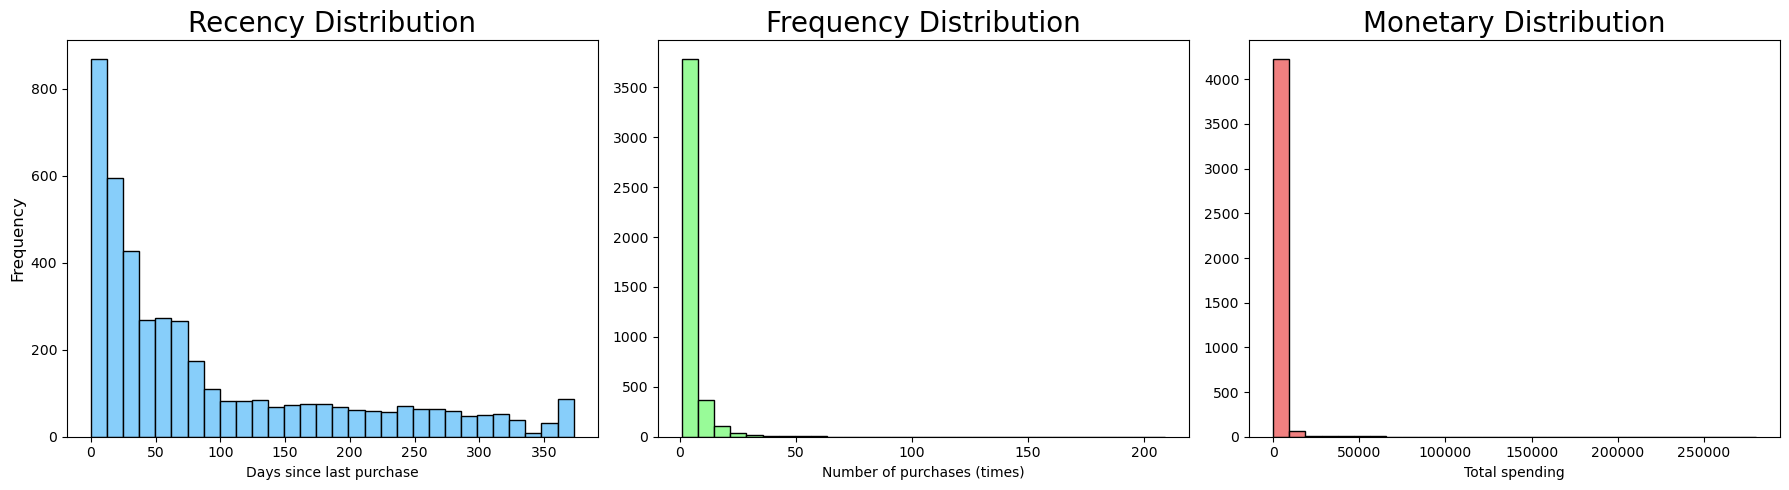

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# Recency Histogram
axes[0].hist(final_df['Recency'], bins = 30, color = 'lightskyblue', edgecolor = 'black')
axes[0].set_title('Recency Distribution', fontsize = 20)
axes[0].set_xlabel('Days since last purchase')
axes[0].set_ylabel('Frequency', fontsize = 12)

# Frequency Histogram 
axes[1].hist(final_df['Frequency'], bins = 30, color = 'palegreen', edgecolor = 'black')
axes[1].set_title('Frequency Distribution', fontsize = 20)
axes[1].set_xlabel('Number of purchases (times)')

# Monetary Histogram
axes[2].hist(final_df['Monetary'], bins = 30, color = 'lightcoral', edgecolor = 'black')
axes[2].set_title('Monetary Distribution', fontsize = 20)
axes[2].set_xlabel('Total spending')

plt.tight_layout()
plt.show()

In [20]:
# Remove outliers

Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - (IQR * 1.5)  
upper_limit = Q3 + (IQR * 1.5)

final_df = final_df[(final_df[final_df.columns] >= lower_limit) 
                  & (final_df[final_df.columns] <= upper_limit)]

filtered_df = final_df.dropna()
filtered_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12348.0,74.0,4.0,1797.24
12349.0,18.0,1.0,1757.55
12350.0,309.0,1.0,334.40
12352.0,35.0,8.0,2506.04
12353.0,203.0,1.0,89.00


4.Segmentation

In [21]:
# Assign score 1-5 based on quantile performance

rfm_df = filtered_df.copy()

rfm_df['RecencyScore'] = pd.qcut(filtered_df['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(filtered_df['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
rfm_df['MonetaryScore'] = pd.qcut(filtered_df['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12348.0,74.0,4.0,1797.24,2,4,5
12349.0,18.0,1.0,1757.55,4,1,5
12350.0,309.0,1.0,334.40,1,1,2
12352.0,35.0,8.0,2506.04,4,5,5
12353.0,203.0,1.0,89.00,1,1,1


In [22]:
# Create RFMScore column
r = pd.to_numeric(rfm_df['RecencyScore'])
f = pd.to_numeric(rfm_df['FrequencyScore'])
m = pd.to_numeric(rfm_df['MonetaryScore'])

rfm_df['RFMScore'] = r + f + m

# Create RFMType column
R = rfm_df['RecencyScore'].astype('str')
F = rfm_df['FrequencyScore'].astype('str')
M = rfm_df['MonetaryScore'].astype('str')

rfm_df['RFMType'] = R + F + M

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMType
CustomerID,,,,,,,,
12348.0,74.0,4.0,1797.24,2,4,5,11,245
12349.0,18.0,1.0,1757.55,4,1,5,10,415
12350.0,309.0,1.0,334.40,1,1,2,4,112
12352.0,35.0,8.0,2506.04,4,5,5,14,455
12353.0,203.0,1.0,89.00,1,1,1,3,111


In [23]:
# Assign broad groups to each customer (broad segmentation)

def segmentation(x):
    if x > 13:
        return 1
    elif x <= 13 & x > 6:
        return 2
    else:
        return 3
    
rfm_df['Group'] = rfm_df['RFMScore'].apply(segmentation)
rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMType,Group
CustomerID,,,,,,,,,
12348.0,74.0,4.0,1797.24,2,4,5,11,245,3
12349.0,18.0,1.0,1757.55,4,1,5,10,415,3
12350.0,309.0,1.0,334.40,1,1,2,4,112,3
12352.0,35.0,8.0,2506.04,4,5,5,14,455,1
12353.0,203.0,1.0,89.00,1,1,1,3,111,3


In [24]:
# Count customers in each group
rfm_df['Group'].value_counts()

Group
3    1994
2    1247
1     469
Name: count, dtype: int64

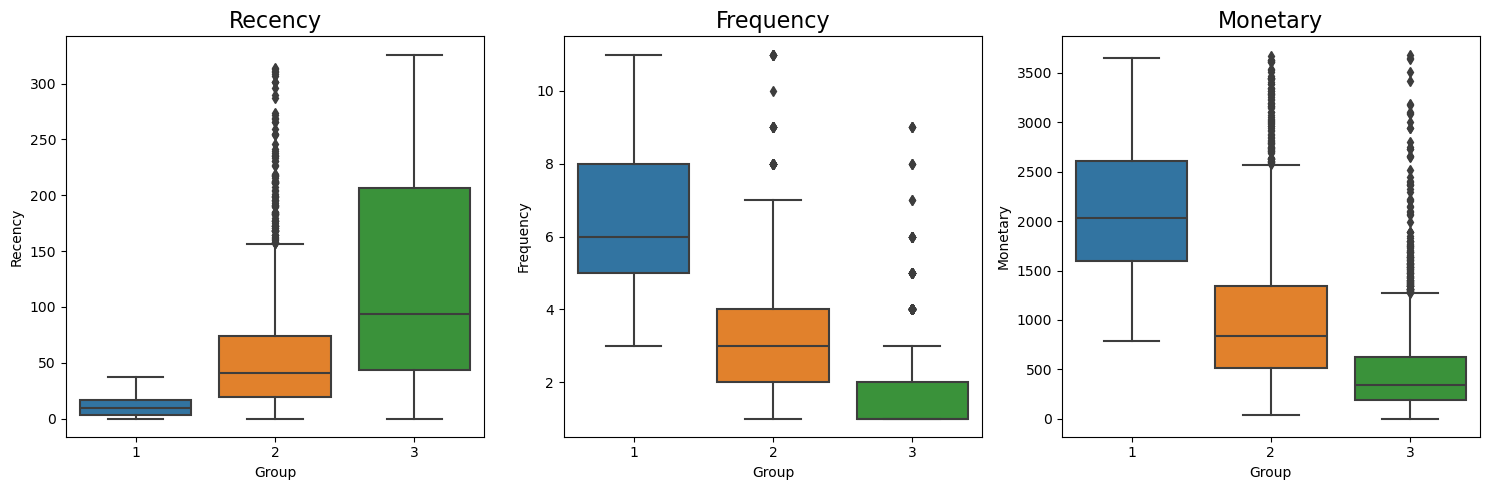

In [25]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# Boxplot for Recency
sns.boxplot(x = 'Group', y = 'Recency', data = rfm_df, ax = axs[0])
axs[0].set_title('Recency', fontsize = 16)

# Boxplot for Frequency
sns.boxplot(x = 'Group', y = 'Frequency', data = rfm_df, ax = axs[1])
axs[1].set_title('Frequency', fontsize = 16)

# Boxplot for Monetary
sns.boxplot(x = 'Group', y = 'Monetary', data = rfm_df, ax = axs[2])
axs[2].set_title('Monetary', fontsize = 16)


plt.tight_layout()
plt.show()

5.Summary

In [26]:

# Stats for broad segmentation
report_1 = rfm_df.groupby('Group')[['Recency', 'Frequency', 'Monetary']].agg(['min', 'mean', 'max'])
report_1

Recency                    Frequency                 Monetary  \
          min        mean    max       min      mean   max      min   
Group                                                                 
1         0.0   11.970149   37.0       3.0  6.646055  11.0   787.60   
2         0.0   59.838813  314.0       1.0  3.165998  11.0    35.40   
3         0.0  125.779840  326.0       1.0  1.730692   9.0     3.75   

                             
              mean      max  
Group                        
1      2106.261194  3649.10  
2      1043.269176  3672.86  
3       495.438953  3683.86

In [28]:
# Stats for detailed segmentation
# Use 'pd.options.display.max_rows = 125' to show all the rows

report_2 = rfm_df.groupby('RFMType')[['Recency', 'Frequency', 'Monetary']].agg(['min', 'mean', 'max'])

report_2

Recency                    Frequency                 Monetary  \
            min        mean    max       min      mean   max      min   
RFMType                                                                 
111       173.0  260.854839  326.0       1.0  1.000000   1.0    30.60   
112       175.0  247.900990  319.0       1.0  1.000000   1.0   235.56   
113       176.0  256.184211  318.0       1.0  1.000000   1.0   440.00   
114       178.0  247.705882  315.0       1.0  1.000000   1.0   775.85   
115       196.0  277.600000  319.0       1.0  1.000000   1.0  1542.08   
...         ...         ...    ...       ...       ...   ...      ...   
551         3.0    7.000000   11.0       5.0  6.000000   7.0   201.12   
552         4.0    9.000000   14.0       6.0  6.000000   6.0   306.72   
553         0.0    7.615385   14.0       4.0  4.615385   6.0   518.19   
554         0.0    7.035714   16.0       4.0  6.000000  10.0   787.60   
555         0.0    6.859813   16.0       4.0  7.294393  11.0  1456.79   

                               
                mean      max  
RFMType                        
111       140.918790   229.47  
112       324.658317   439.03  
113       541.415263   741.26  
114      1103.565294  1384.25  
115      2155.582000  3096.00  
...              ...      ...  
551       210.610000   220.10  
552       353.790000   400.86  
553       654.587692   764.88  
554      1152.627381  1437.57  
555      2368.927991  3649.10  

[121 rows x 9 columns]

README File https://github.com/Seanxupoj/DATA-ANALYST-PORTFOLIO/blob/main/Customer%20Segmentation%20with%20RFM%20Model/README.md